<a href="https://colab.research.google.com/github/mokshManchandani/data-science/blob/deeplearning-pytorch-udemy/MATH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
np_vector = np.array([[1.0, 2.0, 3.0]])
torch_vector = torch.from_numpy(np_vector).float()

# Transpose operations

In [3]:
# transpose of the np_vector
np_vector.T

array([[1.],
       [2.],
       [3.]])

In [4]:
torch_vector.T

tensor([[1.],
        [2.],
        [3.]])

In [5]:
np_matrix = np.arange(1,9).reshape(2, 4)
np_matrix

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [6]:
torch_matrix = torch.from_numpy(np_matrix).float()
torch_matrix

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [7]:
torch_matrix.T

tensor([[1., 5.],
        [2., 6.],
        [3., 7.],
        [4., 8.]])

In [8]:
np_matrix.T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

# Vector Dot products

In [9]:
np_vector_a = np.array([1, 2, 3, 4])
np_vector_b = np.array([0,1,0,-1])

np_vector_a.dot(np_vecor_b) , np.sum(np_vector_a * np_vector_b)

NameError: name 'np_vecor_b' is not defined

In [10]:
torch_vector_a = torch.from_numpy(np_vector_a).float()
torch_vector_b = torch.from_numpy(np_vector_b).float()

torch_vector_a.dot(torch_vector_b), torch.sum(torch_vector_a * torch_vector_b)

(tensor(-2.), tensor(-2.))

# Matrix Multiplication

In [11]:
np_A, np_B, np_C = np.random.randn(3,4), np.random.randn(4, 5), np.random.randn(3, 7)
torch_A, torch_B, torch_C = torch.from_numpy(np_A).float(), torch.from_numpy(np_B).float(), torch.from_numpy(np_C).float()

In [12]:
np.matmul(np_A, np_B)

array([[-2.77365405,  2.56008982, -1.02116271,  2.82119363,  0.56380816],
       [ 1.93553835,  0.01485488,  1.84024285,  2.40700991, -0.2355631 ],
       [-1.20696782, -0.19405196, -2.16765731, -1.18261113, -0.49477676]])

In [13]:
np.matmul(np_A.T, np_C)

array([[ 0.50291502, -0.9330124 , -1.68170257, -2.03803204, -2.22442507,
        -0.50656427,  0.42181993],
       [ 1.99316641,  1.38840702,  0.16154521,  0.71754127, -1.42750726,
         1.03022904,  2.96531578],
       [-1.72445573,  0.8524119 ,  2.20004415,  3.01055058,  2.44589606,
        -0.02553563, -2.07328121],
       [ 0.35293841,  0.26396063, -0.19900546,  0.20693625, -1.29837968,
        -0.02496189,  0.51152226]])

In [14]:
np_B @ np_C

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 5)

In [15]:
torch.matmul(torch_A, torch_B)

tensor([[-2.7737,  2.5601, -1.0212,  2.8212,  0.5638],
        [ 1.9355,  0.0149,  1.8402,  2.4070, -0.2356],
        [-1.2070, -0.1941, -2.1677, -1.1826, -0.4948]])

In [16]:
torch_A.T @ torch_C

tensor([[ 0.5029, -0.9330, -1.6817, -2.0380, -2.2244, -0.5066,  0.4218],
        [ 1.9932,  1.3884,  0.1615,  0.7175, -1.4275,  1.0302,  2.9653],
        [-1.7245,  0.8524,  2.2000,  3.0106,  2.4459, -0.0255, -2.0733],
        [ 0.3529,  0.2640, -0.1990,  0.2069, -1.2984, -0.0250,  0.5115]])

# Softmax

In [17]:
x = torch.linspace(-2, 2, 100)

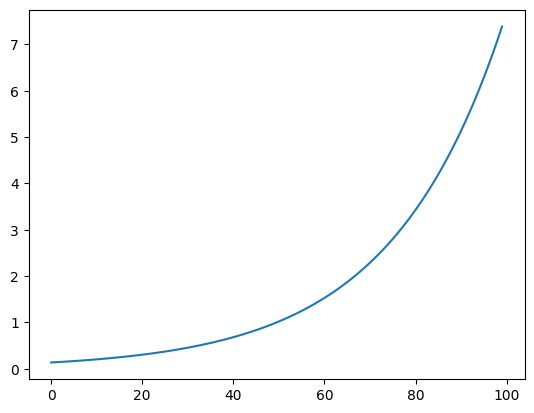

In [18]:
plt.plot(torch.exp(x).numpy());

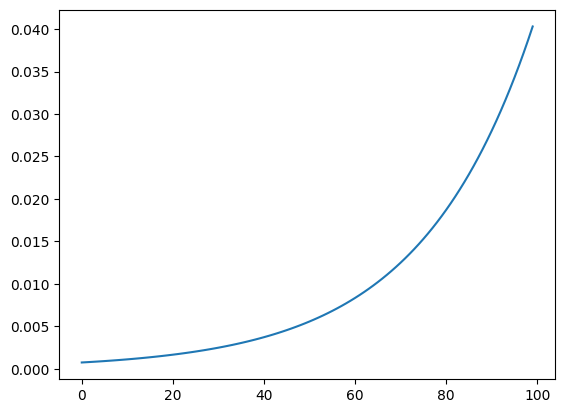

In [19]:
plt.plot(torch.exp(x) / torch.exp(x).sum());

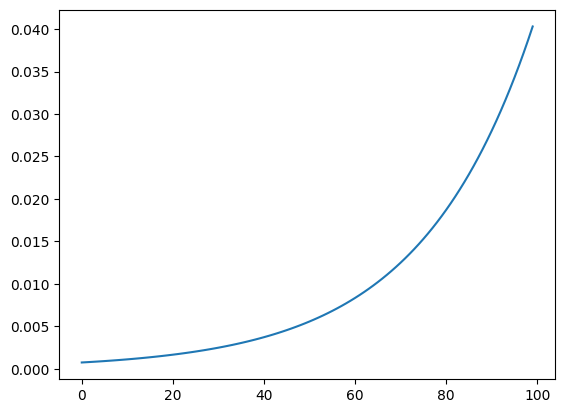

In [20]:
plt.plot(torch.softmax(x, dim=0));

# Logrithims

In [21]:
x = torch.linspace(1, 10, 100)

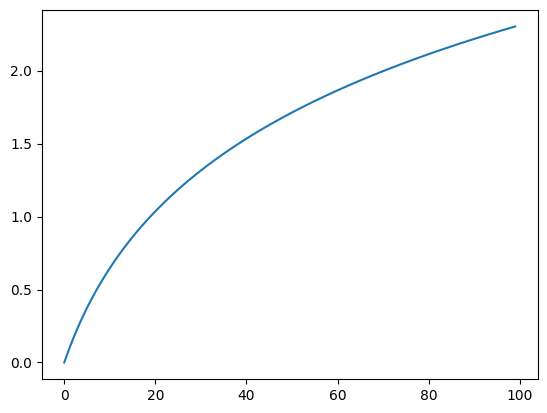

In [22]:
plt.plot(torch.log(x).numpy());

# Shannon Entropy : single value and cross entropy


In [23]:
# probability of an event happening
p = .25
q = 1 - p
x = [p, q]
H = 0
for prob in x:
  H -= prob * np.log(prob)
H

0.5623351446188083

In [24]:
# make sure the probs sum up to 1
P = [1, 0]
Q = [.25, .75]
H = 0
for p, q in zip(P, Q):
  H += -p * np.log(q)
H

1.3862943611198906

In [25]:
P_tensor = torch.Tensor(P)
Q_tensor = torch.Tensor(Q)
F.binary_cross_entropy(Q_tensor, P_tensor)

tensor(1.3863)

# Sampling variablity

In [34]:
x = [1, 2, 4, 6, 5, 4, 0, -4, 5, -2, 6, 10, -9, 1, 3, -6]
n = len(x)

population_mean = np.mean(x)

sample = np.random.choice(x, size=5, replace=True)
sample_mean = np.mean(sample)

print(population_mean, sample_mean)

1.625 -1.0


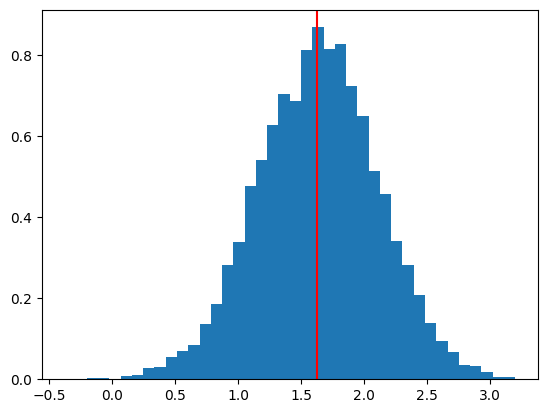

In [39]:
# experiment demonstrating law of large numbers

n_exps = 10_000

sample_means = np.zeros(n_exps)

for i in range(n_exps):
  sample = np.random.choice(x, size=100, replace=True)
  sample_means[i] = np.mean(sample)

plt.hist(sample_means, bins=40, density=True)
plt.axvline(population_mean, color='red');

# Seeding : reproducible random numbers

In [40]:
# old way : np.random.seed(seed_val)

In [41]:
# new way
np_seeder_1 = np.random.RandomState(seed=17)
np_seeder_2 = np.random.RandomState(seed=20241017)

In [49]:
# new way
np_seeder_1 = np.random.RandomState(seed=17)
np_seeder_2 = np.random.RandomState(seed=20241017)
np_seeder_1.randn(3)

array([ 0.27626589, -1.85462808,  0.62390111])

In [53]:
np_seeder_1 = np.random.RandomState(seed=17)
np_seeder_2 = np.random.RandomState(seed=20241017)

np_seeder_2.randn(3)

array([-1.1638425 ,  1.55051823,  0.87856647])

In [54]:
torch.randn(3)

tensor([-0.8770, -0.7910, -1.8975])

In [55]:
torch.manual_seed(17)
torch.randn(3)

tensor([-1.4135,  0.2336,  0.0340])

# T-test

In [97]:
n1 = 100
n2 = 30
mu1 = 1
mu2 = 1

data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

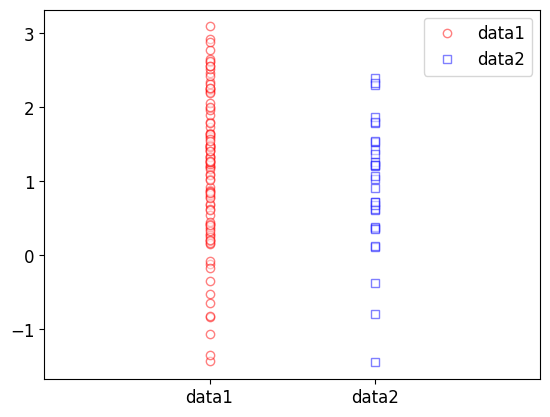

In [98]:
plt.plot(np.zeros(n1),data1, 'ro', markerfacecolor='w', alpha=.5, label='data1')
plt.plot(np.ones(n2),data2, 'bs', markerfacecolor = 'w', alpha=.5, label='data2')
plt.xlim([-1, 2])
plt.xticks([0,1], labels=['data1', 'data2'])
plt.legend();

In [99]:
t, p = stats.ttest_ind(data1, data2)
print(t, p)

1.1298317295113547 0.26065993086275396


In [100]:
if p < 0.05:
  print('Reject the null hypothesis')
  if t > 0:
    print('mu1 > mu2')
  else:
    print('mu1 < mu2')
else:
  print('Fail to reject the null hypothesis')
  print('mu1 = mu2')

Fail to reject the null hypothesis
mu1 = mu2


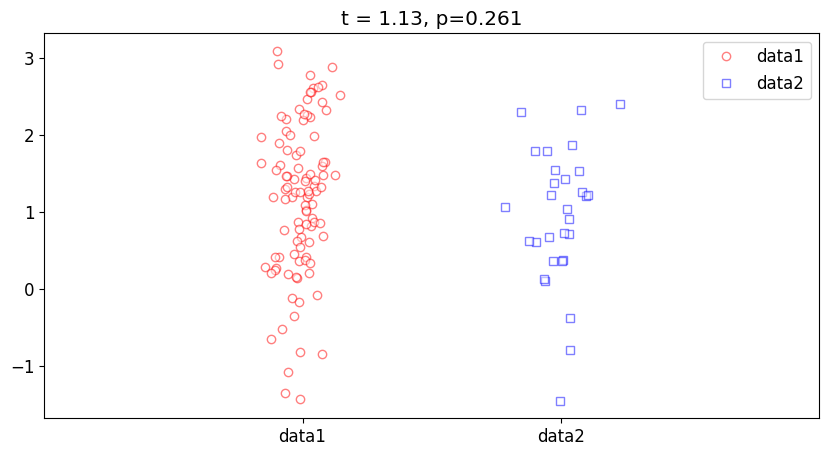

In [102]:
# common way of showing the t-test results
fig = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size':12})

plt.plot(0 + np.random.randn(n1)/15, data1, 'ro', markerfacecolor='w', alpha=.5, label='data1')
plt.plot(1 + np.random.randn(n2)/15, data2, 'bs', markerfacecolor = 'w', alpha=.5, label='data2')
plt.xlim([-1, 2])
plt.xticks([0,1], labels=['data1', 'data2'])
plt.title(f"t = {t:.2f}, p={p:.3f}")
plt.legend()